In [29]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np


In [30]:
train_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")

In [31]:
test_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

**Pre-processing**

In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
train_df.drop(columns={'Cabin'},inplace=True)

In [34]:
test_df.drop(columns={'Cabin'},inplace=True)

In [35]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [36]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [37]:
train_df.dropna(axis=0,inplace=True)
test_df.dropna(axis=0,inplace=True)

In [41]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Creating Pipeline for Preprocessing

In [46]:
preprocessor = ColumnTransformer(
    transformers= [
        ('drop_columns', 'drop', ['PassengerId', 'Name','Ticket']),
        ('encode_categorical', OneHotEncoder(), ['Sex','Embarked']),
        ('scale_numeric', StandardScaler(), ['Age', 'Fare','Pclass','SibSp', 'Parch']),
    ])

In [47]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('kmeans',KMeans(init='k-means++',n_clusters=3,max_iter=500,random_state=42))
])

Fitting the Training Data into Pipeline

In [48]:
pipeline.fit(train_df)
cluster = pipeline.predict(train_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
scores = []
inertias = []
for k in range (2, 11):
    pipeline.set_params (kmeans__n_clusters=k)
    pipeline.fit(train_df)
    clusters = pipeline.predict (train_df)
    score = silhouette_score(pipeline.named_steps ['preprocessor'].transform (train_df), clusters)
    scores.append (score)
    inertia = pipeline.named_steps ['kmeans'].inertia_
    inertias.append (inertia)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

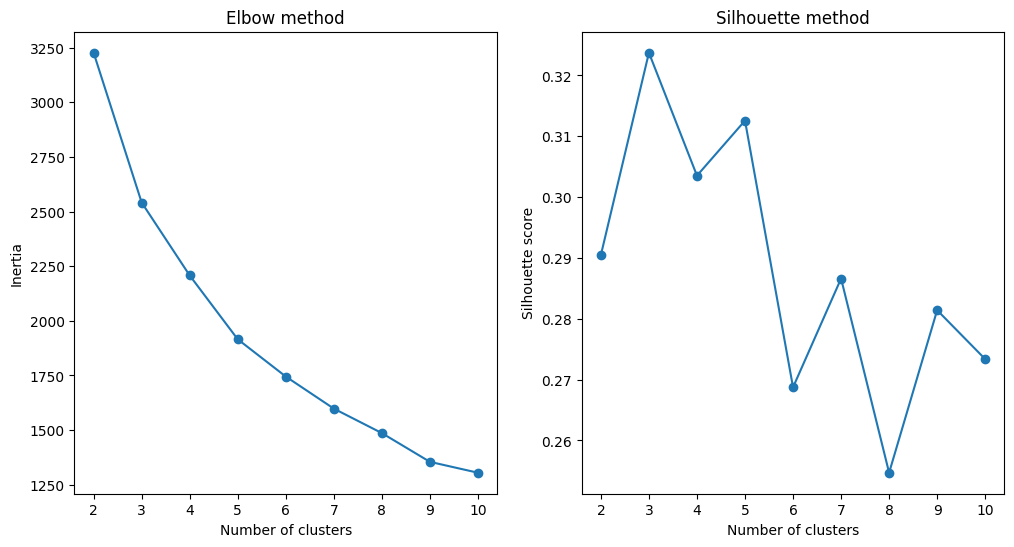

In [50]:
fig, ax = plt. subplots(1, 2, figsize= (12, 6))
ax[0].plot(range (2, 11), inertias, marker= 'o') 
ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow method')
ax[1].plot(range (2, 11), scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette score') 
ax[1].set_title('Silhouette method') 
plt.show()


Clusters for training data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


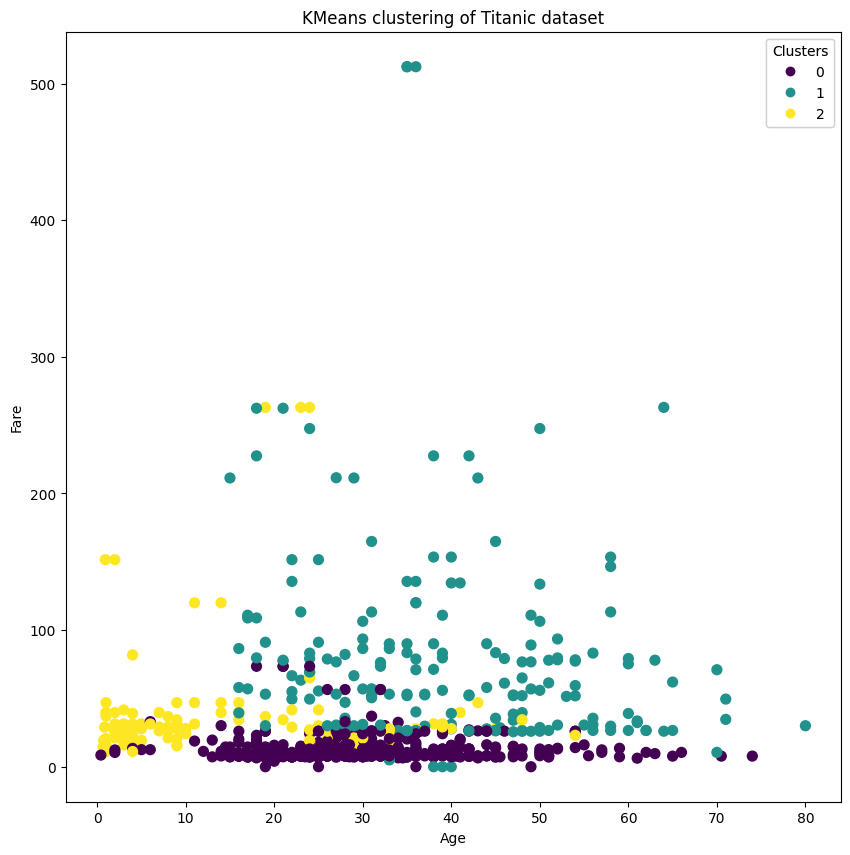

In [54]:
pipeline.set_params (kmeans__n_clusters=3)
pipeline.fit(train_df)
clusters = pipeline.predict (train_df)
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter (train_df['Age'], train_df['Fare'], c=clusters, s=50)
legend = ax. legend (*scatter. legend_elements(), title='Clusters', loc='upper right')
ax.add_artist (legend)
ax. set_xlabel( 'Age')
ax. set_ylabel( 'Fare')
ax. set_title('KMeans clustering of Titanic dataset')
plt.show ()

Clusters for test data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


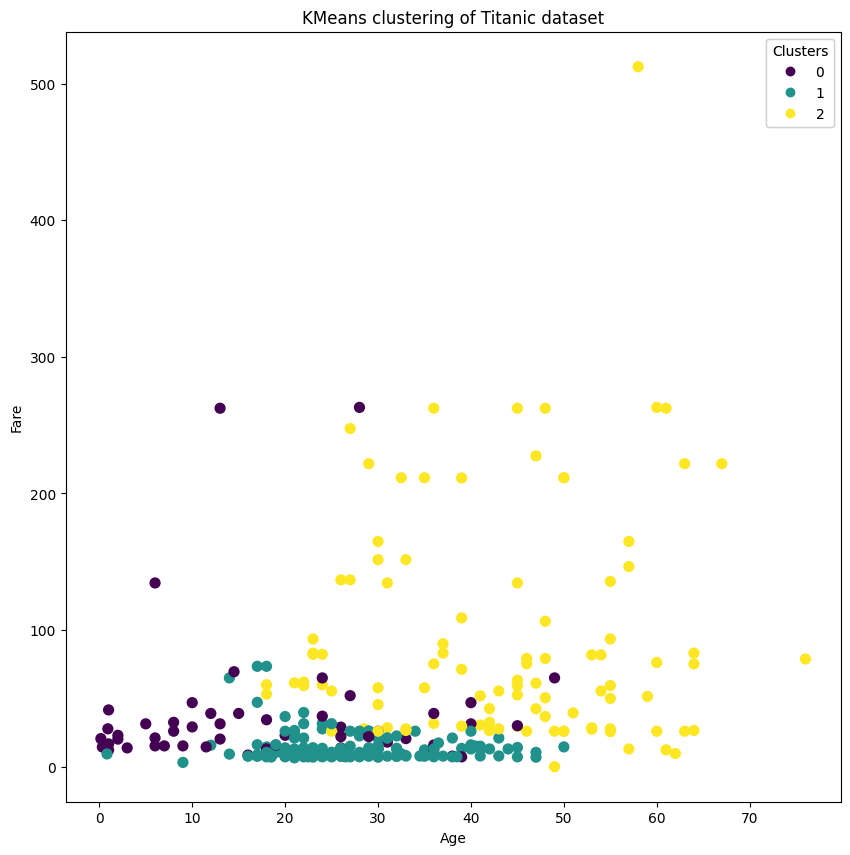

In [55]:
pipeline.set_params (kmeans__n_clusters=3)
pipeline.fit(test_df)
clusters = pipeline.predict (test_df)
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter (test_df['Age'], test_df['Fare'], c=clusters, s=50)
legend = ax. legend (*scatter. legend_elements(), title='Clusters', loc='upper right')
ax.add_artist (legend)
ax. set_xlabel( 'Age')
ax. set_ylabel( 'Fare')
ax. set_title('KMeans clustering of Titanic dataset')
plt.show ()